<a href="https://colab.research.google.com/github/Aminat-K/hse_salary_project_14.04/blob/main/%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B7%D0%B0%D1%80%D0%BF%D0%BB%D0%B0%D1%82_%D0%B4%D0%BB%D1%8F_%D0%92%D0%A8%D0%AD_%D0%90%D0%BC%D0%B8%D1%80%D1%85%D0%B0%D0%BD%D0%BE%D0%B2%D0%B0_%D0%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Проект: анализ зарплат в России

Условные обозначения:
- year - год,
- mining_n - номинальная заработная плата в добыче полезных ископаемых (НЗП_иск), тыс.руб.
- education_n	- номинальная заработная плата в образовании (НЗП_обр), тыс.руб.
- health_n	- номинальная заработная плата в области здравоохранения и социальных услуг (НЗП_здр), тыс.руб.
- inflation	- инфляция, %.
- all_n	- номинальная заработная плата в среднем по всем видам экономической деятельности в целом (НЗП по всем отраслям), тыс. руб.
- mining_r	- реальная заработная плата в добыче полезных ископаемых (НЗП_иск), тыс.руб.
- education_r	- реальная заработная плата в образовании (РЗП_обр),
- health_r	- реальная заработная плата в области здравоохранения и социальных услуг (РЗП_здр), тыс.руб.
- all_r - реальная заработная плата в среднем по всем видам экономической деятельности в целом (РЗП по всем отраслям),

*   Новый пункт
*   Новый пункт

тыс. руб.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [1]:
!git clone https://github.com/Aminat-K/HSE_project.git

Cloning into 'HSE_project'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 26 (delta 12), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (26/26), 21.78 KiB | 5.44 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [4]:
df = pd.read_excel('/content/HSE_project/salary.xlsx')
df.head(5)


,year,mining_n,education_n,health_n,inflation,all_n
0,2000,5940.2,1240.2,1333.3,20.20,2223.4
1,2001,9099.2,1833.0,1959.9,18.58,3240.4
2,2002,11080.9,2927.3,3141.3,15.06,4360.3
3,2003,13912.4,3386.6,3662.6,11.99,5498.5
4,2004,16841.7,4203.4,4612.0,11.74,6739.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         24 non-null     int64  
 1   mining_n     24 non-null     float64
 2   education_n  24 non-null     float64
 3   health_n     24 non-null     float64
 4   inflation    24 non-null     float64
 5   all_n        24 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 1.2 KB


Построим график изменения номинальных зарплат по годам для следующих видов экономической деятельсноти:
- добыча полезных ископаемых (НЗП_иск),
- деятельность в области здравоохранения и социальных услуг (НЗП_здр),
- образование (НЗП_обр),
- все виды экономической деятельности в целом (НЗП по всем отраслям).


<Axes: xlabel='year', ylabel='all_n'>

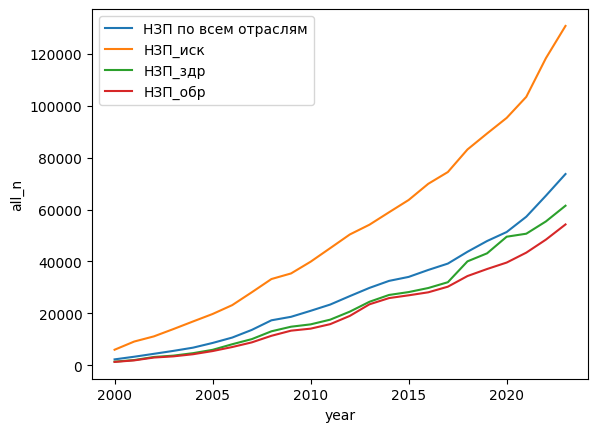

In [ ]:
sns.lineplot(data=df, x="year", y="all_n", label = 'НЗП по всем отраслям')
sns.lineplot(data=df, x="year", y="mining_n", label = 'НЗП_иск')
sns.lineplot(data=df, x="year", y="health_n", label = 'НЗП_здр')
sns.lineplot(data=df, x="year", y="education_n", label = 'НЗП_обр')

На основании данного графика мы можем сделать следующие выводы:
- за рассматриваемый период (2000 - 2023 гг) произошел рост номинальных заработных плат по каждому анализируемому направлению,
- абсолютные величины и темпы роста номинальных заработных плат в области добычи полезных ископаемых значительно превышают остальные рассмотренные виды экономической деятельности,
- наименее привлекательной отраслью с точки зрения размеров номинальных заработных плат является образование,
- интересен факт ярко  выраженного увеличения темпов роста номинальных зарплат в области здравоохранения за период с 2018 по 2020 гг. (индекс номинальных цен в 2018 году составил 1,25) . Что в свою очередь может быть связано с выполнением майских указов президента перед выборами 2018 года.   

Затем добавляем в датафрейм столбцы с расчитанными значениями реальных зарплат по отраслям с учетом уровня инфляции.

In [ ]:
df = df.assign(mining_r = df.mining_n/(1+df.inflation/100))
df = df.assign(education_r = df.education_n/(1+df.inflation/100))
df = df.assign(health_r = df.health_n/(1+df.inflation/100))
df = df.assign(all_r = df.all_n/(1+df.inflation/100))
df.head(5)


,year,mining_n,education_n,health_n,inflation,all_n,mining_r,education_r,health_r,all_r
0,2000,5940.2,1240.2,1333.3,20.20,2223.4,4941.930116,1031.780366,1109.234609,1849.750416
1,2001,9099.2,1833.0,1959.9,18.58,3240.4,7673.469388,1545.791870,1652.808231,2732.669927
2,2002,11080.9,2927.3,3141.3,15.06,4360.3,9630.540588,2544.150878,2730.140796,3789.588041
3,2003,13912.4,3386.6,3662.6,11.99,5498.5,12422.894901,3024.020002,3270.470578,4909.813376
4,2004,16841.7,4203.4,4612.0,11.74,6739.5,15072.221228,3761.768391,4127.438697,6031.412207


In [ ]:
df.describe()

,year,mining_n,education_n,health_n,inflation,all_n,mining_r,education_r,health_r,all_r
count,24.000000,24.000000,24.00000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2011.500000,53067.995833,20829.77500,23423.854167,9.644583,28047.554167,49243.236712,19359.831958,21778.595183,26044.919934
std,7.071068,36175.305078,15930.73969,18440.445027,4.536459,20581.820493,34005.013233,14923.936807,17288.396228,19278.115481
min,2000.000000,5940.200000,1240.20000,1333.300000,2.520000,2223.400000,4941.930116,1031.780366,1109.234609,1849.750416
25%,2005.750000,22290.625000,6594.90000,7521.325000,6.362500,10114.150000,20372.197178,6028.920691,6876.972169,9245.246470
50%,2011.500000,47766.300000,17402.20000,19092.600000,8.900000,24999.050000,44913.106915,16361.381547,17951.103356,23505.265084
75%,2017.250000,76650.075000,31283.45000,33991.975000,11.937500,40306.250000,74425.549756,30373.855657,32992.614322,39136.550128
max,2023.000000,130825.600000,54262.70000,61485.500000,20.200000,73709.300000,121788.866133,50514.522435,57238.409980,68617.855148


Расчитаем и добавим в датафрейм темпы роста номинальных и реальных заработных плат про интересующим нас направлениям.

In [ ]:
df['index_m_n']=df['mining_n']/df['mining_n'].shift(1)
df['index_m_r']=df['mining_r']/df['mining_r'].shift(1)
df['index_e_n']=df['education_n']/df['education_n'].shift(1)
df['index_e_r']=df['education_r']/df['education_r'].shift(1)
df['index_h_n']=df['health_n']/df['health_n'].shift(1)
df['index_h_r']=df['health_r']/df['health_r'].shift(1)
df['index_all_n']=df['all_n']/df['all_n'].shift(1)
df['index_all_r']=df['all_r']/df['all_r'].shift(1)
df.fillna(1, inplace=True)
df

,year,mining_n,education_n,health_n,inflation,all_n,mining_r,education_r,health_r,all_r,index_m_n,index_m_r,index_e_n,index_e_r,index_h_n,index_h_r,index_all_n,index_all_r
0,2000,5940.2,1240.2,1333.3,20.20,2223.4,4941.930116,1031.780366,1109.234609,1849.750416,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2001,9099.2,1833.0,1959.9,18.58,3240.4,7673.469388,1545.791870,1652.808231,2732.669927,1.531800,1.552727,1.477987,1.498179,1.469962,1.490044,1.457408,1.477318
2,2002,11080.9,2927.3,3141.3,15.06,4360.3,9630.540588,2544.150878,2730.140796,3789.588041,1.217788,1.255044,1.596999,1.645856,1.602786,1.651819,1.345605,1.386771
3,2003,13912.4,3386.6,3662.6,11.99,5498.5,12422.894901,3024.020002,3270.470578,4909.813376,1.255530,1.289948,1.156902,1.188617,1.165950,1.197913,1.261037,1.295606
4,2004,16841.7,4203.4,4612.0,11.74,6739.5,15072.221228,3761.768391,4127.438697,6031.412207,1.210553,1.213262,1.241186,1.243963,1.259215,1.262032,1.225698,1.228440
5,2005,19726.9,5429.7,5905.6,10.91,8554.9,17786.403390,4895.591020,5324.677667,7713.371202,1.171313,1.180078,1.291740,1.301407,1.280486,1.290068,1.269367,1.278867
6,2006,23145.2,6983.3,8059.9,9.00,10633.9,21234.128440,6406.697248,7394.403670,9755.871560,1.173281,1.193840,1.286130,1.308667,1.364789,1.388704,1.243019,1.264800
7,2007,28107.5,8778.3,10036.6,11.87,13593.4,25125.145258,7846.875838,8971.663538,12151.068204,1.214399,1.183244,1.257042,1.224793,1.245251,1.213305,1.278308,1.245513
8,2008,33206.1,11316.8,13048.6,13.28,17290.1,29313.294492,9990.112994,11518.891243,15263.153249,1.181396,1.166692,1.289179,1.273133,1.300102,1.283919,1.271948,1.256116
9,2009,35363.4,13293.6,14819.5,8.80,18637.5,32503.125000,12218.382353,13620.863971,17130.055147,1.064967,1.108819,1.174678,1.223047,1.135716,1.182480,1.077929,1.122314


In [ ]:
decrease = df[(df < 1).any(axis=1)]
decrease

,year,mining_n,education_n,health_n,inflation,all_n,mining_r,education_r,health_r,all_r,index_m_n,index_m_r,index_e_n,index_e_r,index_h_n,index_h_r,index_all_n,index_all_r
21,2021,103473.5,43390.5,50690.1,8.39,57243.7,95464.064951,40031.829505,46766.399114,52812.71335,1.085094,1.050256,1.096744,1.061532,1.023381,0.990524,1.114905,1.07911


На основании произведенных расчетов, мы можем сделать следующий вывод: инфляция приводит к снижению реальных зарплат по сравнению с номинальными, однако в связи с тем, что темпы роста заработных плат больше уровеня инфляции, реальные доходы текущего года превышают реальные доходы в предыдущем периоде.
Исключением в данном случае является реальная заработная плата в области здравоохранения в 2021, уровень которой понизился по сравнению с 2020 годом.


Визуализируем и отобразим динамику изменения реальных зарплат с учетом инфляции и их соотношение с номинальными заработными платами.

<Axes: xlabel='year', ylabel='all_r'>

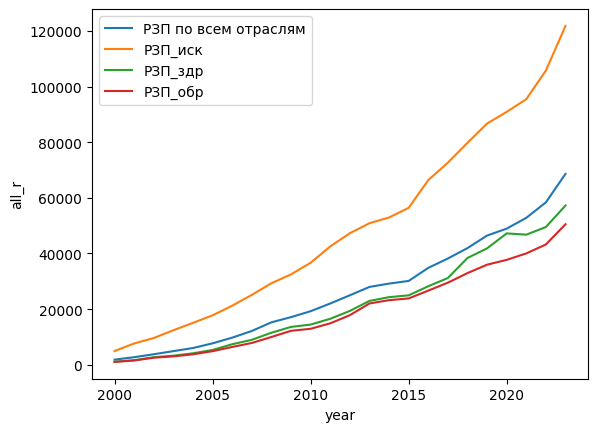

In [ ]:
sns.lineplot(data=df, x="year", y="all_r", label = 'РЗП по всем отраслям')
sns.lineplot(data=df, x="year", y="mining_r", label = 'РЗП_иск' )
sns.lineplot(data=df, x="year", y="health_r", label = 'РЗП_здр')
sns.lineplot(data=df, x="year", y="education_r", label = 'РЗП_обр')

<ipython-input-10-eb4381baacbe>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['year'],


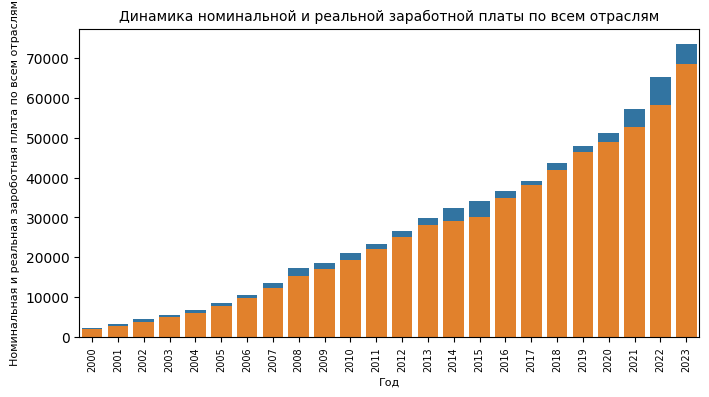

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4))

ax = sns.barplot(data = df,
            x = 'year',
            y = 'all_n');

ax.set_xticklabels(df['year'],
                   rotation = 90,
                   fontsize = 7);

plt.title("Динамика номинальной и реальной заработной платы по всем отраслям", fontsize = 10) #заголовок рисунка
plt.ylabel('Номинальная и реальная заработная плата по всем отраслям', fontsize = 8) #подпись оси ординат
plt.xlabel("Год", fontsize = 8) #подпись оси абцисс
ax = sns.barplot(data = df,
            x = 'year',
            y = 'all_r');

<ipython-input-118-76e944de6a79>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['year'],


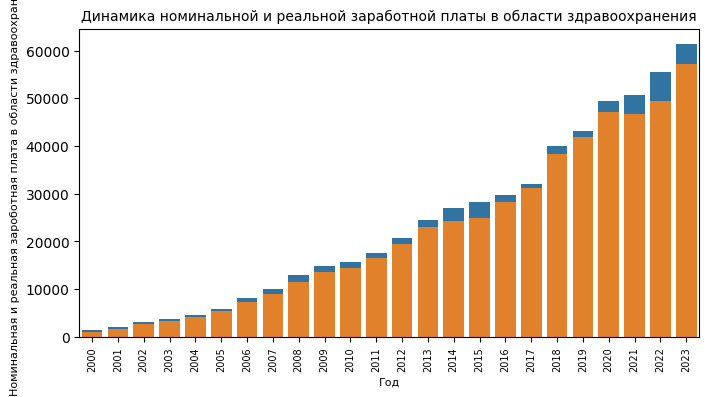

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4))

ax = sns.barplot(data = df,
            x = 'year',
            y = 'health_n');

ax.set_xticklabels(df['year'],
                   rotation = 90,
                   fontsize = 7);

plt.title("Динамика номинальной и реальной заработной платы в области здравоохранения", fontsize = 10) #заголовок рисунка
plt.ylabel('Номинальная и реальная заработная плата в области здравоохранения', fontsize = 8) #подпись оси ординат
plt.xlabel("Год", fontsize = 8) #подпись оси абцисс
ax = sns.barplot(data = df,
            x = 'year',
            y = 'health_r');


<Axes: xlabel='year', ylabel='health_r'>

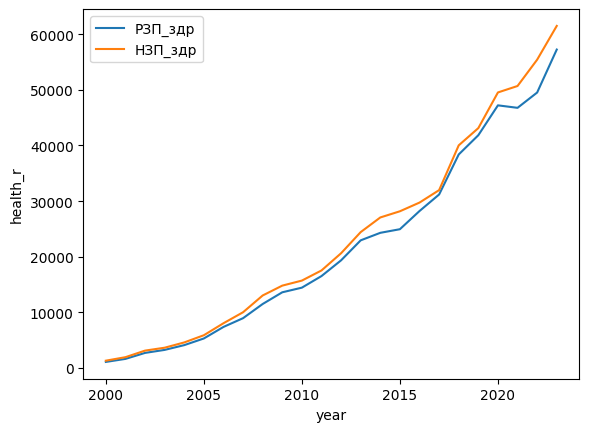

In [ ]:
sns.lineplot(data=df, x="year", y="health_r", label = 'РЗП_здр')
sns.lineplot(data=df, x="year", y="health_n", label = 'НЗП_здр')

<ipython-input-11-88e257d12421>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['year'],


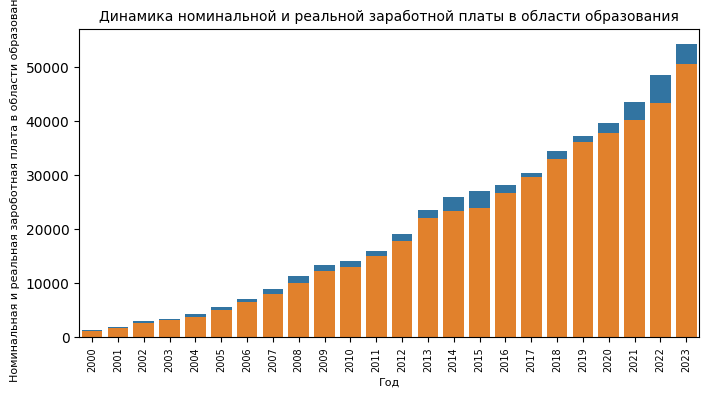

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4))

ax = sns.barplot(data = df,
            x = 'year',
            y = 'education_n');

ax.set_xticklabels(df['year'],
                   rotation = 90,
                   fontsize = 7);

plt.title("Динамика номинальной и реальной заработной платы в области образования", fontsize = 10) #заголовок рисунка
plt.ylabel('Номинальная и реальная заработная плата в области образования', fontsize = 8) #подпись оси ординат
plt.xlabel("Год", fontsize = 8) #подпись оси абцисс
ax = sns.barplot(data = df,
            x = 'year',
            y = 'education_r');

<ipython-input-116-91355c0a8649>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['year'],


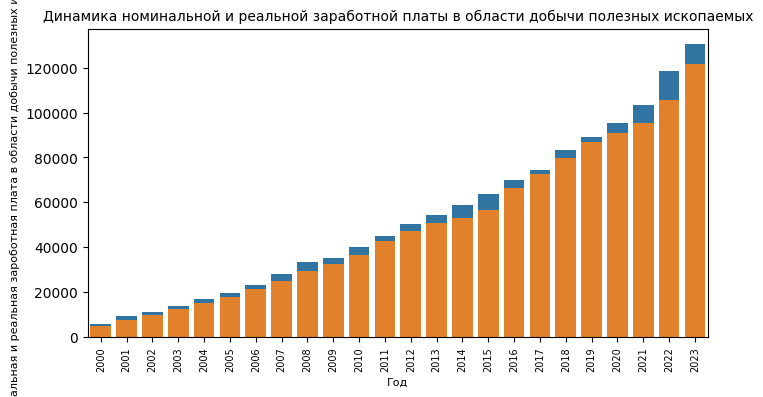

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4))

ax = sns.barplot(data = df,
            x = 'year',
            y = 'mining_n');

ax.set_xticklabels(df['year'],
                   rotation = 90,
                   fontsize = 7);

plt.title("Динамика номинальной и реальной заработной платы в области добычи полезных ископаемых", fontsize = 10) #заголовок рисунка
plt.ylabel('Номинальная и реальная заработная плата в области добычи полезных ископаемых', fontsize = 8) #подпись оси ординат
plt.xlabel("Год", fontsize = 8) #подпись оси абцисс
ax = sns.barplot(data = df,
            x = 'year',
            y = 'mining_r');

Использование инструментов визуализация для отображения динамики изменения реальных зарплат с учетом инфляции наглядно подтверждает сделанные выше выводы, а именно:
-  инфляция приводит к снижению реальных зарплат по сравнению с номинальными, однако в связи с тем, что темпы роста заработных плат больше уровня инфляции, реальные доходы текущего года превышают реальные доходы в предыдущем периоде за сключением реальной заработной платы в области здравоохранения в 2021, уровень которой понизился по сравнению с 2020 годом.
- за рассматриваемый период (2000 - 2023 гг) произошел рост номинальных и реальных заработных плат по каждому анализируемому направлению,
- абсолютные величины номинальных и реальных заработных плат в области добычи полезных ископаемых значительно превышают уровень заработных плат в остальных рассмотренных видах экономической деятельности,
- наименее привлекательной отраслью с точки зрения размеров номинальных и реальных  заработных плат является образование.